# Maestría en Inteligencia Artificial Aplicada
## Curso: Proyecto Integrador
### Tecnológico de Monterrey

# Avance 1. Análisis exploratorio de datos

####**Variables**

Los datos se extrajeron de la plataforma: https://portal.satrack.com/ para la flota de asfalto del 24/04/2024 - 30/04/2024.

Hay **17** variables en el dataset descargado:

* Vehículo - Placa del tractocamión que realiza la ruta
* Estado - Estado del GPS conectado al tractocamión (Alarma, Apagado, Detenido, Detenido-Ralenti, Movimiento)
* Tipo de Evento - Detalle del tractocamión de acuerdo al estado
* Fecha GPS - Fecha en la que se esta realizando la captura del dato
* Hora GPS - Hora en formato 24 horas en la que se esta realizando la captura del dato
* Ubicación - Detalle de Calle, Carrera, Comuna/Vereda, Municipio, Departamento
* Velocidad - Velocidad detectada por el GPS en km/h
* Odómetro - Kilometraje recorrido
* Longitud - Es la distancia en grados, minutos y segundos que hay con respecto al meridiano principal, que es el meridiano de Greenwich (0º).La longitud puede ser este y oeste.
* Latitud - Es la distancia en grados, minutos y segundos que hay con respecto al paralelo principal, que es el ecuador (0º). La latitud puede ser norte y sur.
* Sentido - Sentido de la ruta
* Fecha Sistema - Fecha en la cual se ingresa la información en la Base de Datos
* Hora Sistema - Hora en la cual se ingresa la información en la Base de Datos
* Temperatura - Temperatura del tractocamión
* Estado de la Puerta - Estado de la puerta
* Edad del dato - Estado del dato en el sistema (Nueva, Vieja)
* Nivel de Batería - Nivel de la Batería del tractocamión




## 0. Importamos librerías básicas

In [99]:
# Importamos librerías pandas, numpy y re
import re
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib as mpl
import matplotlib.pyplot as plt
from tqdm import tqdm
from shapely.geometry import Point

## 1. Cargamos los datos.


In [67]:
# Importamos dataset
link_archivo = "/Detalle_Semanal_Asfalto.csv"
#link_archivo = "/content/drive/MyDrive/Trimestre VII/Proyecto Integrador/Detalle_Semanal_Asfalto.csv"
df_original = pd.read_csv(link_archivo, delimiter=';', encoding = "UTF-8", encoding_errors='ignore' )

In [68]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
df = df_original.copy()

## 2. Exploramos la estructuras del df, como columnas y tipo de datos, contenido de las filas, tipo de datos, etc.

In [70]:
# Obtenemos una pequeña impresión sobre el contenido de nuestra información
df.head()

,Vehculo,Estado,Tipo de Evento,Fecha GPS,Hora GPS,Ubicacin,Velocidad (km/h),Odmetro,Longitud,Latitud,Sentido,Fecha Sistema,Hora Sistema,Temperatura,Estado de la puerta,Edad del dato,Nivel de Batera
0,LCN410,Apagado,Tiempo Vehculo apagado,2024/04/24,00:17:17 AM,"Tv 49, 57, San Martn, Comuna 6, Barrancabermej...",0.0,308144.0,-73.82349,7.07423,Norte,2024/04/24,00:18:43 AM,-,-,Nueva,-
1,LCN410,Apagado,Tiempo Vehculo apagado,2024/04/24,00:19:17 AM,"Tv 49, 57, San Martn, Comuna 6, Barrancabermej...",0.0,308144.0,-73.82349,7.07423,Norte,2024/04/24,00:19:56 AM,-,-,Nueva,-
2,LCN410,Apagado,Tiempo Vehculo apagado,2024/04/24,00:30:14 AM,"Tv 49, 57, San Martn, Comuna 6, Barrancabermej...",0.0,308144.0,-73.82351,7.07424,Norte,2024/04/24,00:30:54 AM,-,-,Nueva,-
3,LCN410,Apagado,Tiempo Vehculo apagado,2024/04/24,00:48:10 AM,"Tv 49, 57, San Martn, Comuna 6, Barrancabermej...",0.0,308144.0,-73.82350,7.07423,Norte,2024/04/24,00:48:51 AM,-,-,Nueva,-
4,LCN410,Apagado,Tiempo Vehculo apagado,2024/04/24,00:50:09 AM,"Tv 49, 57, San Martn, Comuna 6, Barrancabermej...",0.0,308144.0,-73.82349,7.07422,Norte,2024/04/24,00:50:35 AM,-,-,Nueva,-


In [44]:
# Vemos las dimensiones de nuestro df en (filas, columnas)
df.shape

(4707, 1)

In [ ]:
# Exploramos la columnas del df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220478 entries, 0 to 220477
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Vehículo             220478 non-null  object 
 1   Estado               220478 non-null  object 
 2   Tipo de Evento       220478 non-null  object 
 3   Fecha GPS            220478 non-null  object 
 4   Hora GPS             220478 non-null  object 
 5   Ubicación            220478 non-null  object 
 6   Velocidad (km/h)     220478 non-null  int64  
 7   Odómetro             220478 non-null  int64  
 8   Longitud             220478 non-null  float64
 9   Latitud              220478 non-null  float64
 10  Sentido              220478 non-null  object 
 11  Fecha Sistema        220478 non-null  object 
 12  Hora Sistema         220478 non-null  object 
 13  Temperatura          220478 non-null  object 
 14  Estado de la puerta  220478 non-null  object 
 15  Edad del dato    

In [ ]:
# Convertimos los tipos de datos que no tienen el formato adecuado
df['Fecha GPS'] = pd.to_datetime(df['Fecha GPS'])
#df['Hora GPS'] = df['Hora GPS'].str.replace(' AM', '').str.replace(' PM', '')
#df['Hora GPS'] = pd.to_datetime(df['Hora GPS'], format='%H:%M:%S').dt.time
df['Fecha Sistema'] = pd.to_datetime(df['Fecha Sistema'])
#df['Hora Sistema'] = df['Hora Sistema'].str.replace(' AM', '').str.replace(' PM', '')
#df['Hora Sistema'] = pd.to_datetime(df['Hora Sistema'], format='%H:%M:%S').dt.time

#df.head()
df.dtypes


Vehículo                       object
Estado                         object
Tipo de Evento                 object
Fecha GPS              datetime64[ns]
Hora GPS                       object
Ubicación                      object
Velocidad (km/h)                int64
Odómetro                        int64
Longitud                      float64
Latitud                       float64
Sentido                        object
Fecha Sistema          datetime64[ns]
Hora Sistema                   object
Temperatura                    object
Estado de la puerta            object
Edad del dato                  object
Nivel de Batería               object
dtype: object

In [ ]:
#df = df_original.copy()

## 3. Análisis de datos nulos o faltantes, e información inconsistente.

Como notamos arriba en la inspección de campos o columnas, nos percatamos que ninguno posee valores nulos. Podemos corroborar de todas formas con el método `.isna()` o `.isnull()`.

In [ ]:
# Vemos si hay valores nulos
df.isnull().sum()

Vehículo               0
Estado                 0
Tipo de Evento         0
Fecha GPS              0
Hora GPS               0
Ubicación              0
Velocidad (km/h)       0
Odómetro               0
Longitud               0
Latitud                0
Sentido                0
Fecha Sistema          0
Hora Sistema           0
Temperatura            0
Estado de la puerta    0
Edad del dato          0
Nivel de Batería       0
dtype: int64

Observamos que no hay datos nulos, pero explorando datos en Excel, nos percatamos de que hay muchas columnas que tienen como información un guión `(-)`, en esos casos esos guiones pueden ser valores nulos o responden a un estado de otra columna en específico.

Creamos una tabla con **valores únicos** para analizar qué columnas hacen ruido en nuestro df y podamos descartarlas.

In [ ]:
from IPython.display import display, Markdown

# Visualizamos datos únicos por algunas columnas categóricas y otras por analizar
columnas = ['Estado', 'Tipo de Evento', 'Sentido', 'Temperatura', 'Estado de la puerta', 'Edad del dato', 'Nivel de Batería']

display(Markdown(f'**Valores únicos de las columnas:** </br></br>'))

for columna in columnas:
    valores_unicos = df[columna].unique()
    display(Markdown(f'**{columna}:**'))
    print(valores_unicos)
    #print("\n")  # Agrega una línea en blanco para mejorar la legibilidad

**Valores únicos de las columnas:** </br></br>

**Estado:**

['Apagado' 'Detenido-Ralenti' 'Movimiento' 'Detenido' 'Alarma']


**Tipo de Evento:**

['Tiempo Vehículo apagado' 'Vehículo encendido'
 'Tiempo Vehículo encendido' 'Terminó exceso de velocidad'
 'Reporte por tiempo' 'Frenada Brusca' 'Respuesta interrogación'
 'Vehículo apagado' 'Batería principal desconectada'
 'Batería principal conectada' 'Botón de pánico'
 'Tiempo vehículo encendido' 'Tiempo vehículo apagado'
 'Detección de Intermitencia Anómala (DIA)'
 'Bateria principal desconectada' 'Bateria principal conectada'
 'Aceleración Brusca' 'Alarma por tiempo de vehículo detenido'
 'Giro Repentino' 'Cierre de Puerta' 'Apertura de Puerta'
 'Reporte por tiempo-']


**Sentido:**

['Norte' 'Sur' 'Oriente' 'Sur-Oriente' 'Nor-Oriente' 'Nor-Occidente'
 'Occidente' 'Sur-Occidente' '-']


**Temperatura:**

['-']


**Estado de la puerta:**

['-' 'Cerrada' 'Abierta']


**Edad del dato:**

['Nueva' 'Vieja']


**Nivel de Batería:**

['-' '0']


Podemos **descartar** del df los campos **Nivel de Batería** y **Temperatura**, ya que vemos que no poseen información alguna. Podemos observar también que las columnas **Sentido** y **Estado de la puerta** poseen información de sus categorías, pero adicionalmente tienen valores con guiones `(-)` y debemos averiguar qué quieren decir esos guiones.

In [ ]:
# Analizamos la columna sentido y vemos cuantos valores únicos hay con guión (-)
df_guion = df[df['Sentido'].eq('-')]
num_valores_guion = len(df_guion)
print(f'Número de valores que son "-" exactamente en la columna "Sentido": {num_valores_guion}')

Número de valores que son "-" exactamente en la columna "Sentido": 4


In [ ]:
# Filtramos la columna Sentido con el -
df_filtrado = df[df['Sentido'] == '-']
df_filtrado

,Vehículo,Estado,Tipo de Evento,Fecha GPS,Hora GPS,Ubicación,Velocidad (km/h),Odómetro,Longitud,Latitud,Sentido,Fecha Sistema,Hora Sistema,Temperatura,Estado de la puerta,Edad del dato,Nivel de Batería
40292,LCO725,Alarma,Detección de Intermitencia Anómala (DIA),2024-04-24,18:24:11 PM,"Vía a San Alberto, Sabana de Torres, Santander",0,0,-73.543149,7.412056,-,2024-04-24,23:24:11 PM,-,-,Nueva,-
40301,LCO725,Alarma,Detección de Intermitencia Anómala (DIA),2024-04-24,18:32:13 PM,"Vía a San Alberto, Sabana de Torres, Santander",0,0,-73.543149,7.412056,-,2024-04-24,23:32:13 PM,-,-,Nueva,-
195611,XFA351,Alarma,Detección de Intermitencia Anómala (DIA),2024-04-28,08:24:10 AM,"Vía Santa Cecilia - Autopista, Barrancabermeja...",0,0,-73.807150,7.060260,-,2024-04-28,13:24:10 PM,-,-,Nueva,-
195612,XFA351,Alarma,Detección de Intermitencia Anómala (DIA),2024-04-28,08:32:11 AM,"Vía Santa Cecilia - Autopista, Barrancabermeja...",0,0,-73.807150,7.060260,-,2024-04-28,13:32:11 PM,-,-,Nueva,-


In [ ]:
# Analizamos la columna Estado de la puerta y vemos cuantos valores únicos hay con guión (-)
df_guion_2 = df[df['Estado de la puerta'].eq('-')]
num_valores_guion_2 = len(df_guion_2)
print(f'Número de valores que son "-" exactamente en la columna "Estado de la puerta": {num_valores_guion_2}')

# Al ver que son bastantes registros con guiones procedemos a ver la totalidad de registros del df
print("\nDimensiones del df: ", df.shape)

# Miramos qué proporción de de guiones en la columna
proporcion = num_valores_guion_2 / df.shape[0]

print(f'\nLa proporción de valores que son "-" en la columna "Estado de la puerta" es: {round(proporcion * 100, 2)}%')

Número de valores que son "-" exactamente en la columna "Estado de la puerta": 220375

Dimensiones del df:  (220478, 17)

La proporción de valores que son "-" en la columna "Estado de la puerta" es: 99.95%


Para el campo **Sentido**: Logramos observar que los guiones `(-)` solamente son 4 y coinciden  con la categoría ***Alarma*** del campo **Estado** y con `0` en el campo **Velocidad (km/h)** como campos relavantes para comparar. Se podría considerar colocar una nueva categoría que reemplace ese `(-)` en el campo **Sentido**, o descartar estos 4 ítems.
</br></br>
Para el campo **Estado de la puerta**: Logramos observar que los guiones `(-)` corresponden al 99.95% de la totalidad de los datos. Por lo cuál, sería otra columna a descartar del dataset ya que no ofrece información valiosa.

## 4. Estadística Descriptiva Básica y Visuzalización de Datos

In [ ]:
df[['Velocidad (km/h)', 'Odómetro', 'Longitud', 'Latitud']].describe()

,Velocidad (km/h),Odómetro,Longitud,Latitud
count,220478.000000,220478.000000,220478.000000,220478.000000
mean,35.309741,214821.456549,-73.877295,8.676961
std,29.303865,150344.197872,0.457470,1.641286
min,0.000000,0.000000,-75.688608,2.435849
25%,0.000000,119239.250000,-74.102188,7.123865
50%,40.000000,161734.500000,-73.792149,8.525213
75%,63.000000,298489.750000,-73.578832,10.153960
max,134.000000,824200.000000,-72.265980,11.737530


from matplotlib import pyplot as plt
_df_0['Velocidad (km/h)'].plot(kind='hist', bins=20, title='Velocidad (km/h)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Odómetro'].plot(kind='hist', bins=20, title='Odómetro')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Longitud'].plot(kind='hist', bins=20, title='Longitud')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Latitud'].plot(kind='hist', bins=20, title='Latitud')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Velocidad (km/h)', y='Odómetro', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Odómetro', y='Longitud', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Longitud', y='Latitud', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['Velocidad (km/h)'].plot(kind='line', figsize=(8, 4), title='Velocidad (km/h)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Odómetro'].plot(kind='line', figsize=(8, 4), title='Odómetro')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Longitud'].plot(kind='line', figsize=(8, 4), title='Longitud')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Latitud'].plot(kind='line', figsize=(8, 4), title='Latitud')
plt.gca().spines[['top', 'right']].set_visible(False)

Podemos ver que todas las variables númericas tienen comportamiento **bimodal**, lo cual puede implicar aplicar alguna técnica de procesado de los mismos.

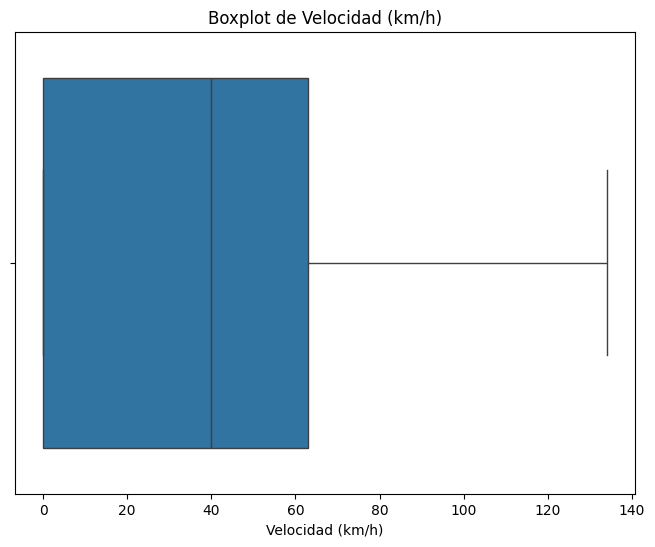

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Velocidad (km/h)'])
plt.title('Boxplot de Velocidad (km/h)')
plt.show()

In [ ]:
df['Estado'].value_counts()

Estado
Movimiento          151883
Detenido-Ralenti     49496
Apagado              13813
Detenido              5282
Alarma                   4
Name: count, dtype: int64

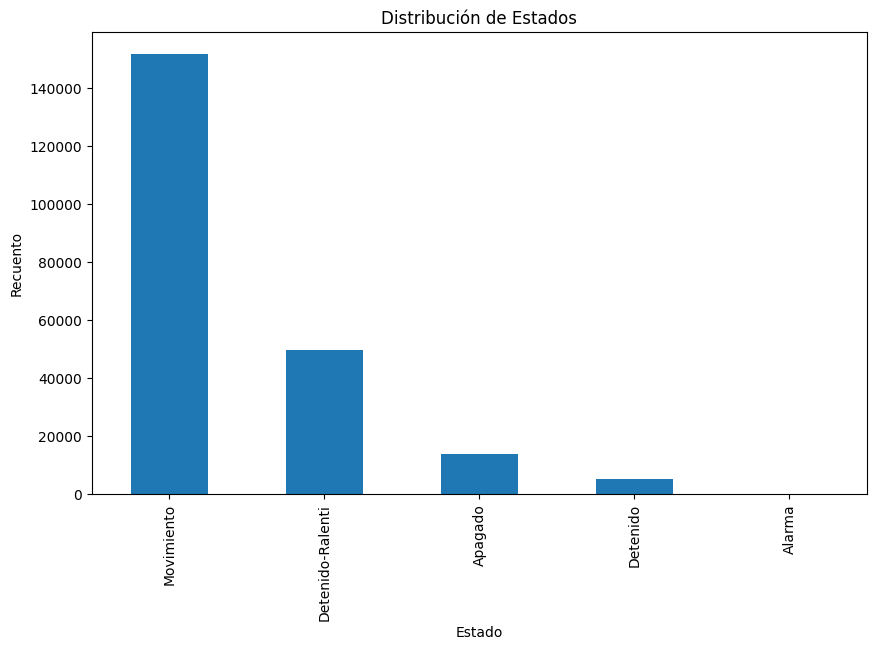

In [ ]:
plt.figure(figsize=(10, 6))
df['Estado'].value_counts().plot(kind='bar')
plt.title('Distribución de Estados')
plt.xlabel('Estado')
plt.ylabel('Recuento')
plt.show()

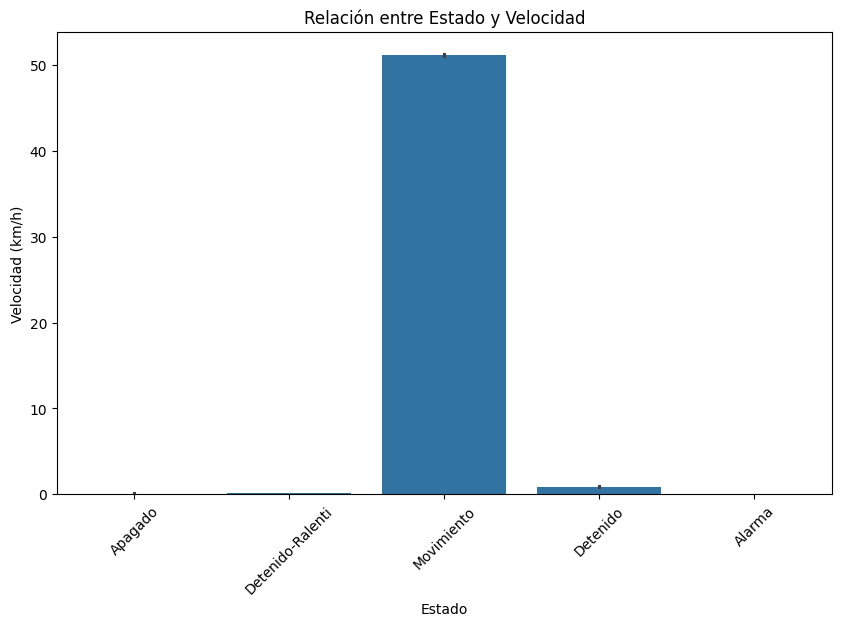

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Estado', y='Velocidad (km/h)', data=df)
plt.title('Relación entre Estado y Velocidad')
plt.xlabel('Estado')
plt.ylabel('Velocidad (km/h)')
plt.xticks(rotation=45)
plt.show()

## 5. Relación entre dos o más variables

In [85]:
# Analizamos la correlación de las variables numericas
corr = df[['Velocidad (km/h)', 'Odmetro', 'Longitud', 'Latitud']].corr().round(2)

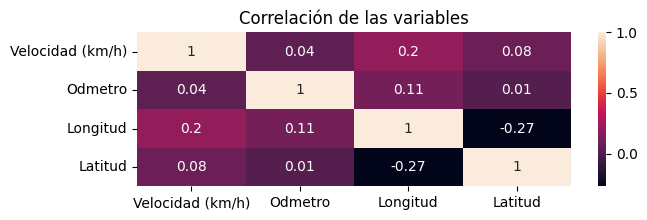

In [92]:
plt.figure(figsize=(7,2))
sns.heatmap(corr,annot=True)
plt.title("Correlación de las variables")
plt.show()

Se identifica que las variables con mayor relación positiva son: Velocidad (km/h) y Longitud, y, las variables con mayor relación negativa son: Longitud y Latitud.

## 6. Patrones o agrupaciones

In [107]:
df["Coordenadas"] = list(zip(df.Longitud, df.Latitud))
df["Coordenadas"] = df["Coordenadas"].apply(Point)
df.head()

,Vehculo,Estado,Tipo de Evento,Fecha GPS,Hora GPS,Ubicacin,Velocidad (km/h),Odmetro,Longitud,Latitud,Sentido,Fecha Sistema,Hora Sistema,Temperatura,Estado de la puerta,Edad del dato,Nivel de Batera,Coordenadas
0,LCN410,Apagado,Tiempo Vehculo apagado,2024/04/24,00:17:17 AM,"Tv 49, 57, San Martn, Comuna 6, Barrancabermej...",0.0,308144.0,-73.82349,7.07423,Norte,2024/04/24,00:18:43 AM,-,-,Nueva,-,POINT (-73.82349 7.07423)
1,LCN410,Apagado,Tiempo Vehculo apagado,2024/04/24,00:19:17 AM,"Tv 49, 57, San Martn, Comuna 6, Barrancabermej...",0.0,308144.0,-73.82349,7.07423,Norte,2024/04/24,00:19:56 AM,-,-,Nueva,-,POINT (-73.82349 7.07423)
2,LCN410,Apagado,Tiempo Vehculo apagado,2024/04/24,00:30:14 AM,"Tv 49, 57, San Martn, Comuna 6, Barrancabermej...",0.0,308144.0,-73.82351,7.07424,Norte,2024/04/24,00:30:54 AM,-,-,Nueva,-,POINT (-73.82351 7.07424)
3,LCN410,Apagado,Tiempo Vehculo apagado,2024/04/24,00:48:10 AM,"Tv 49, 57, San Martn, Comuna 6, Barrancabermej...",0.0,308144.0,-73.82350,7.07423,Norte,2024/04/24,00:48:51 AM,-,-,Nueva,-,POINT (-73.8235 7.07423)
4,LCN410,Apagado,Tiempo Vehculo apagado,2024/04/24,00:50:09 AM,"Tv 49, 57, San Martn, Comuna 6, Barrancabermej...",0.0,308144.0,-73.82349,7.07422,Norte,2024/04/24,00:50:35 AM,-,-,Nueva,-,POINT (-73.82349 7.07422)


In [108]:
gdf = gpd.GeoDataFrame(df, geometry="Coordenadas")
gdf.head()

,Vehculo,Estado,Tipo de Evento,Fecha GPS,Hora GPS,Ubicacin,Velocidad (km/h),Odmetro,Longitud,Latitud,Sentido,Fecha Sistema,Hora Sistema,Temperatura,Estado de la puerta,Edad del dato,Nivel de Batera,Coordenadas
0,LCN410,Apagado,Tiempo Vehculo apagado,2024/04/24,00:17:17 AM,"Tv 49, 57, San Martn, Comuna 6, Barrancabermej...",0.0,308144.0,-73.82349,7.07423,Norte,2024/04/24,00:18:43 AM,-,-,Nueva,-,POINT (-73.82349 7.07423)
1,LCN410,Apagado,Tiempo Vehculo apagado,2024/04/24,00:19:17 AM,"Tv 49, 57, San Martn, Comuna 6, Barrancabermej...",0.0,308144.0,-73.82349,7.07423,Norte,2024/04/24,00:19:56 AM,-,-,Nueva,-,POINT (-73.82349 7.07423)
2,LCN410,Apagado,Tiempo Vehculo apagado,2024/04/24,00:30:14 AM,"Tv 49, 57, San Martn, Comuna 6, Barrancabermej...",0.0,308144.0,-73.82351,7.07424,Norte,2024/04/24,00:30:54 AM,-,-,Nueva,-,POINT (-73.82351 7.07424)
3,LCN410,Apagado,Tiempo Vehculo apagado,2024/04/24,00:48:10 AM,"Tv 49, 57, San Martn, Comuna 6, Barrancabermej...",0.0,308144.0,-73.82350,7.07423,Norte,2024/04/24,00:48:51 AM,-,-,Nueva,-,POINT (-73.82350 7.07423)
4,LCN410,Apagado,Tiempo Vehculo apagado,2024/04/24,00:50:09 AM,"Tv 49, 57, San Martn, Comuna 6, Barrancabermej...",0.0,308144.0,-73.82349,7.07422,Norte,2024/04/24,00:50:35 AM,-,-,Nueva,-,POINT (-73.82349 7.07422)


In [109]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")
world.head()

<ipython-input-109-8d61362a6d0f>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,889953.0,Oceania,Fiji,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,58005463.0,Africa,Tanzania,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253.0,Africa,W. Sahara,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,37589262.0,North America,Canada,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,328239523.0,North America,United States of America,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [103]:
#Verificamos Colombia
world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

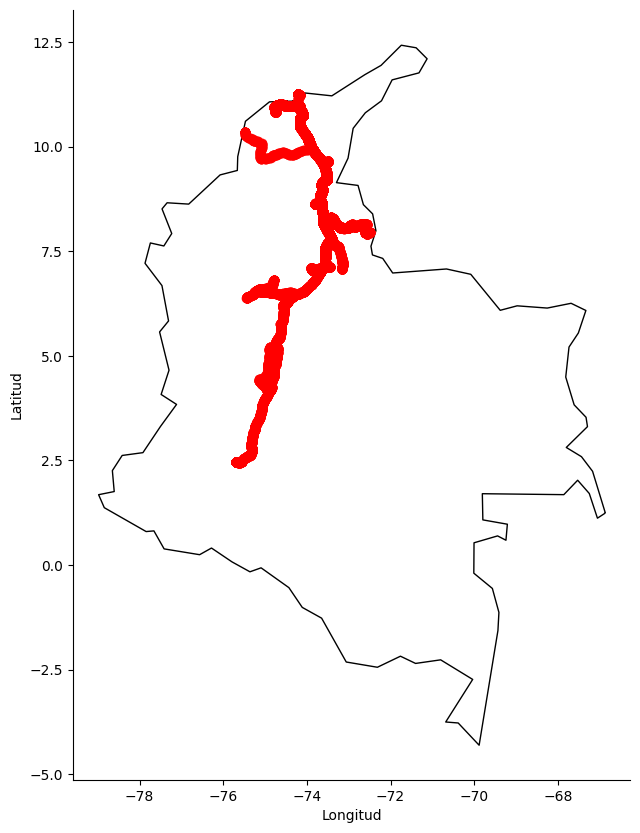

In [106]:
fig, gax = plt.subplots(figsize=(10,10))
world.query("name == 'Colombia'").plot(ax=gax, edgecolor='black',color='white')
gax.set_xlabel('Longitud')
gax.set_ylabel('Latitud')
gdf.plot(ax=gax, color='red', alpha = 0.5)
gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

Se verifica que no existen valores atíppicos respecto a la Latitud y Longitud. Adicional, se encuentra el patron de las rutas respecto a estas variables.